# Newton's method
https://en.wikipedia.org/wiki/Newton%27s_method  

An iterative procedure to find numerical solutions or roots to an equaition using an initial guess.  

When mapping out the initial guesses, they converge to results in an image known as Newton's fractal, which is geometrically interesting.  

## f(z) = z**4 + 1
We will map the function, which has four roots.

import pi, cos and sin from cmath:

In [1]:
from cmath import pi, cos, sin

Solutions to the problem (Euler's formula): 

In [2]:
solutions = [cos((2*n+1)*pi/4) + 1j*sin((2*n+1)*pi/4) for n in range(4)]

Print out solutions to verify using pprint:

In [8]:
from pprint import pprint
pprint([z**4 for z in solutions])

[(-1+4.440892098500626e-16j),
 (-1+4.440892098500626e-16j),
 (-1.0000000000000004+6.661338147750941e-16j),
 (-1.0000000000000004+6.661338147750941e-16j)]


Since there are four solutions, there will be four colours.

Set the colors Red Green Blue Yellow in a list of RBG value tuples:

In [14]:
colours = [(1,0,0), (0,1,0), (0,0,1), (1,1,0)]

Using colour depth to define the shade of the colour to represent how close to a solution, i.e. the distance.  

Generate a list of values corresponding to the distances using a list coprehension.  
For example using an arbitrary root:

In [16]:
z = sqrt(2)/2*(1+1j)
z

(0.7071067811865476+0.7071067811865476j)

The error, or distance to solution:

In [18]:
err = [abs(z-root) for root in solutions]
err

[1.1102230246251565e-16, 1.414213562373095, 2.0, 1.4142135623730954]

Combine these values with the numbers 0-3 to represent the indices to the colour list using the zip() function:

In [19]:
zip(err, range(len(colours)))

In [20]:
list(_)

[(1.1102230246251565e-16, 0),
 (1.414213562373095, 1),
 (2.0, 2),
 (1.4142135623730954, 3)]

Find the minimum error by calling the function min(). To find the correct colour, we index the colour associated with min(distances)[1]:

In [21]:
distances = list(zip(err, range(len(colour))))
min(distances)

(1.1102230246251565e-16, 0)

Which is the first colour Red:

In [22]:
colours[min(distances)[1]]

(1, 0, 0)

To get the colour, multiply the RGB values by distance (colour depth):

In [39]:
colour = [i*colour_depth for i in colours[min(distances)[1]]]
colour

[221, 0, 0]

Convert colour to tuple:

In [42]:
tuple(colour)

(221, 0, 0)

## put it all together


In [12]:
# create a z**4+1 = 0 fractal using the Newton-Raphson root finding method
delta = 0.000001 # convergence criteria
res = 800 # image size
iters = 30 # number of iterations

import Image module from the PIL library  
import all from cmath library

In [10]:
from PIL import Image
from cmath import *

Create an image to draw on, paint it black initially

In [46]:
img = Image.new("RGB", (res, res), (0,0,0))

Iterate through the real and imaginary parts (row/col) to get possible solutions:

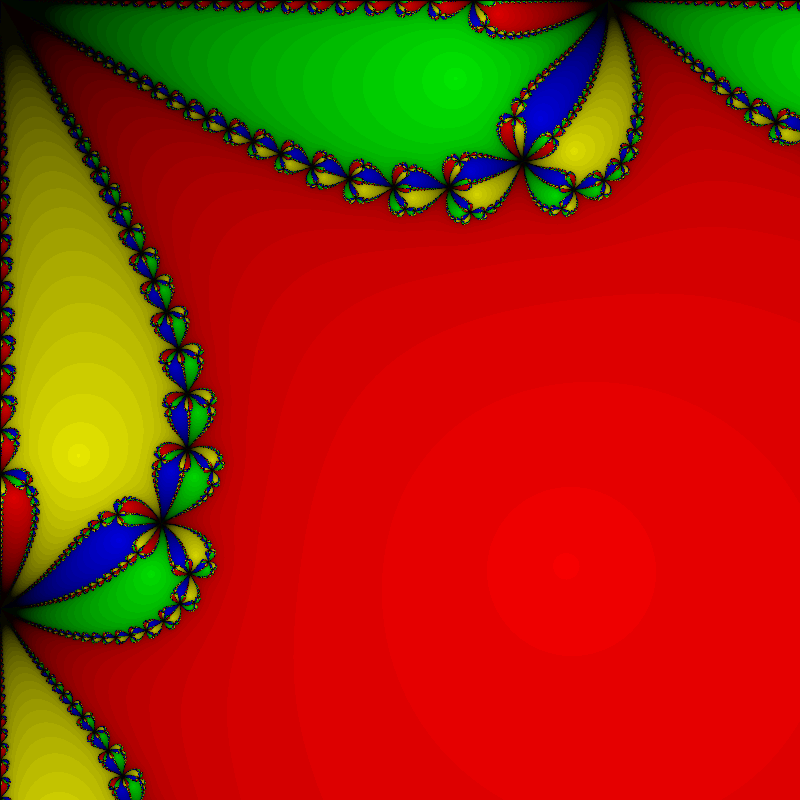

In [15]:
for re in range(res):
    for im in range(res):
        z = (re+1j*im)/res
        for i in range(iters):
            try:
                z -= (z**4+1)/(4*z**3)
            except ZeroDivisionError:
                # possibly divide by zero exception
                continue
            if (abs(z**4+1)<delta):
                break
        
        # colour depth is a function of number of iterations
        colour_depth = int((iters-i)*255.0/iters)
        
        # find to which solution this guess converge to 
        err = [abs(z-root) for root in solutions]
        distances = zip(err, range(len(colours)))
        
        # select the colour associated with the solution
        colour = [i*colour_depth for i in colours[min(distances)[1]]]
        img.putpixel((re,im), tuple(colour))
img

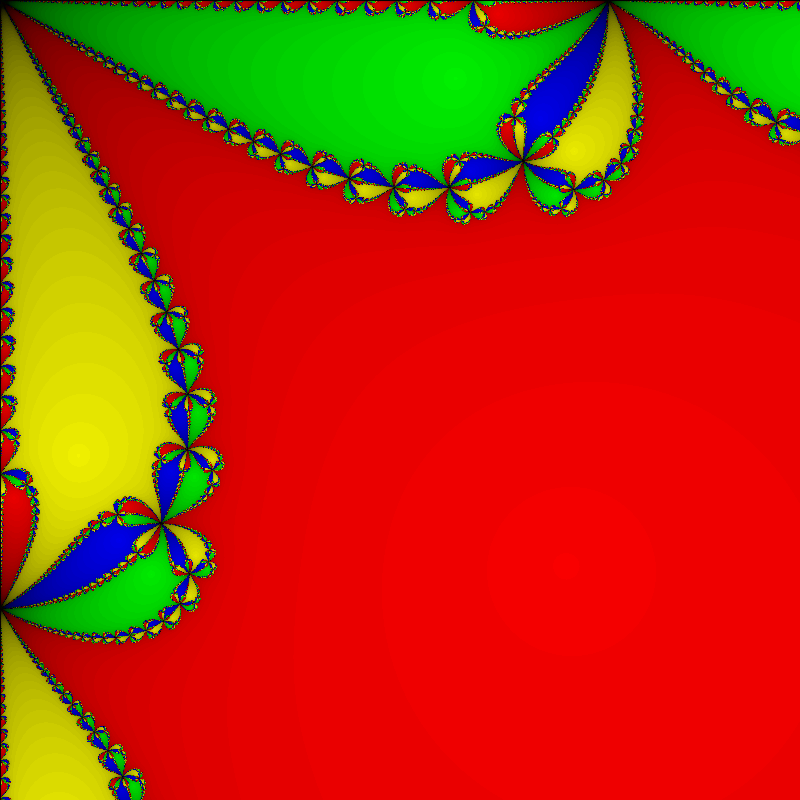

In [51]:
iters = 50 # number of iterations
for re in range(res):
    for im in range(res):
        z = (re+1j*im)/res
        for i in range(iters):
            try:
                z -= (z**4+1)/(4*z**3)
            except ZeroDivisionError:
                # possibly divide by zero exception
                continue
            if (abs(z**4+1)<delta):
                break
        
        # colour depth is a function of number of iterations
        colour_depth = int((iters-i)*255.0/iters)
        
        # find to which solution this guess converge to 
        err = [abs(z-root) for root in solutions]
        distances = zip(err, range(len(colours)))
        
        # select the colour associated with the solution
        colour = [i*colour_depth for i in colours[min(distances)[1]]]
        img.putpixel((re,im), tuple(colour))
img